In [1]:
import pandas as pd # Dataset manipulation
import numpy as np # Dataset manipulation
import seaborn as sns #statistical data visualization
import matplotlib.pyplot as plt # Visualization
from sklearn.model_selection import train_test_split # Splitting data into training and test sets
from sklearn.metrics import accuracy_score # Measures the accuracy of the model
from sklearn import metrics # Scores the performance of the model
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix

In [2]:
diab_data = pd.read_csv("../../Data/Diabetes_Archive/diabetes_prediction_dataset.csv")

# EDA

In [3]:
diab_data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
diab_data.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
diab_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [6]:
diab_data['diabetes'].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

91,500 non-diabetic people and 8,500 diabetic people

In [7]:
diab_data['diabetes'].value_counts()/100000

0    0.915
1    0.085
Name: diabetes, dtype: float64

# Descriptive Analysis

In [8]:
correlation_df = diab_data.corr()
correlation_df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
age,1.000000,0.251171,0.233354,0.337396,0.101354,0.110672,0.258008
hypertension,0.251171,1.000000,0.121262,0.147666,0.080939,0.084429,0.197823
heart_disease,0.233354,0.121262,1.000000,0.061198,0.067589,0.070066,0.171727
bmi,0.337396,0.147666,0.061198,1.000000,0.082997,0.091261,0.214357
HbA1c_level,0.101354,0.080939,0.067589,0.082997,1.000000,0.166733,0.400660
blood_glucose_level,0.110672,0.084429,0.070066,0.091261,0.166733,1.000000,0.419558
diabetes,0.258008,0.197823,0.171727,0.214357,0.400660,0.419558,1.000000


In [9]:
diab_data[diab_data['hypertension'] == 1]['diabetes'].value_counts()

0    5397
1    2088
Name: diabetes, dtype: int64

In [10]:
diab_data[diab_data['heart_disease'] == 1]['diabetes'].value_counts()

0    2675
1    1267
Name: diabetes, dtype: int64

In [11]:
diab_data[diab_data['diabetes'] == 1]['gender'].value_counts()

Female    4461
Male      4039
Name: gender, dtype: int64

Overall, focus is to predict whether an individual has diabetes based on the other 6 columns. So mainly looking for correlation between diabetes and the other variables. 
1. BGL has a correlation of 0.42 
2. HbA1c_level has a correlation of 0.4
3. Age has a correlation of 0.26

We will examine the relationship between the three features and diabetes variable.

In [12]:
indices = np.array([1,6,7,8])
df = diab_data.iloc[:,indices]
df.head()

,age,HbA1c_level,blood_glucose_level,diabetes
0,80.0,6.6,140,0
1,54.0,6.6,80,0
2,28.0,5.7,158,0
3,36.0,5.0,155,0
4,76.0,4.8,155,0


In [13]:
df = diab_data[diab_data['diabetes'] == 1]

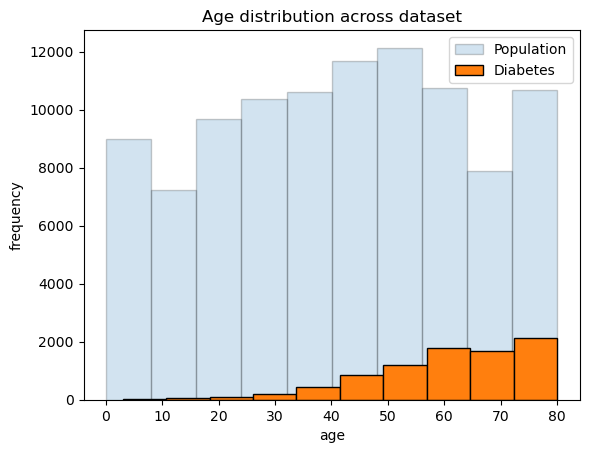

In [14]:
plt.hist(diab_data['age'],histtype='bar',alpha=0.2, bins=10, ec = 'black',label="Population");
plt.hist(df['age'], histtype='bar', ec = 'black', bins=10,label="Diabetes")
plt.xlabel('age')
plt.ylabel('frequency')
plt.title('Age distribution across dataset')
plt.legend(loc='best')

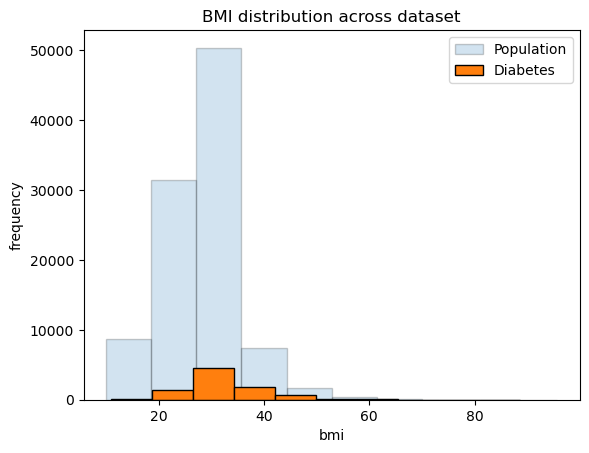

In [15]:
plt.hist(diab_data['bmi'],histtype='bar',alpha=0.2,bins=10, ec = 'black',label="Population");
plt.hist(df['bmi'], histtype='bar', ec = 'black',bins=10,label="Diabetes")
plt.xlabel('bmi')
plt.ylabel('frequency')
plt.title('BMI distribution across dataset')
plt.legend(loc='best')

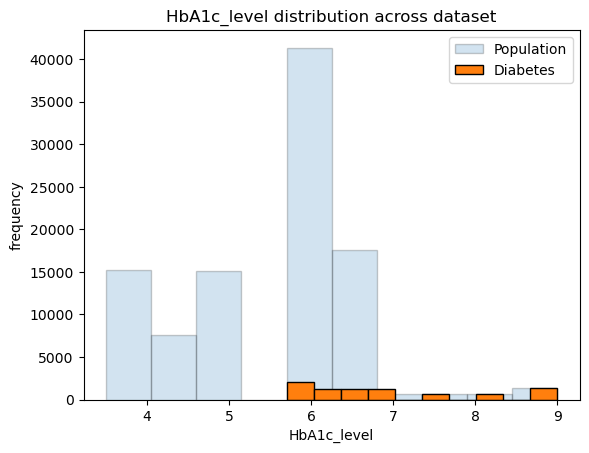

In [16]:
plt.hist(diab_data['HbA1c_level'],histtype='bar',alpha=0.2,bins=10, ec = 'black', label="Population");
plt.hist(df['HbA1c_level'], histtype='bar', ec = 'black',bins=10,label="Diabetes")
plt.xlabel('HbA1c_level')
plt.ylabel('frequency')
plt.title('HbA1c_level distribution across dataset')
plt.legend(loc='best')

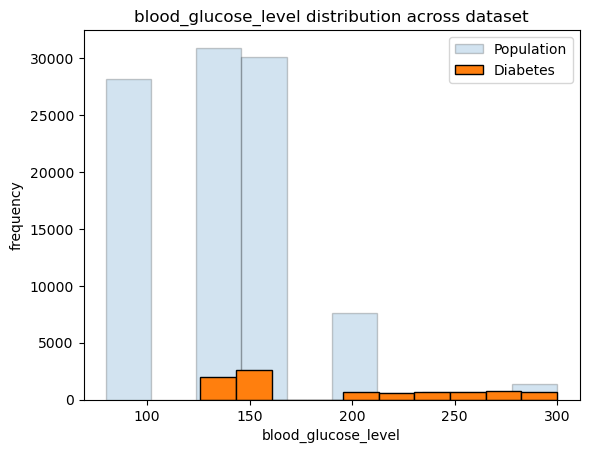

In [17]:
plt.hist(diab_data['blood_glucose_level'],histtype='bar',alpha=0.2,bins=10, ec = 'black',label="Population" );
plt.hist(df['blood_glucose_level'], histtype='bar', ec = 'black',bins=10,label="Diabetes")
plt.xlabel('blood_glucose_level')
plt.ylabel('frequency')
plt.title('blood_glucose_level distribution across dataset')
plt.legend(loc='best')

In [18]:
diab_data['gender_num'] = pd.Categorical(diab_data['gender']).codes
diab_data['smoking_history_num'] = pd.Categorical(diab_data['smoking_history']).codes

In [85]:
pd.Categorical(diab_data['smoking_history'])

['never', 'No Info', 'never', 'current', 'current', ..., 'No Info', 'No Info', 'former', 'never', 'current']
Length: 100000
Categories (6, object): ['No Info', 'current', 'ever', 'former', 'never', 'not current']

In [20]:
column_index = np.array([1,2,3,5,6,7,8,9,10])
num_data = diab_data.iloc[:,column_index]

In [21]:
data_80 = num_data[num_data['age'] == 80]
len(data_80)

5621

Outlier present in oldest age containing more than 5000 individuals at that age. We are interested in predicting diabetes so lets look at the distribution of diabetes in this age group.

In [22]:
data_80['diabetes'].value_counts()/len(data_80)

0    0.817826
1    0.182174
Name: diabetes, dtype: float64

There is an increased population of diabetics in this age group compared to the data as a whole. We need to look into how influential of an outlier this is.

In [23]:
data_subset = num_data[num_data['age'] != 80]
data_subset.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_num,smoking_history_num
1,54.0,0,0,27.32,6.6,80,0,0,0
2,28.0,0,0,27.32,5.7,158,0,1,4
3,36.0,0,0,23.45,5.0,155,0,0,1
4,76.0,1,1,20.14,4.8,155,0,1,1
5,20.0,0,0,27.32,6.6,85,0,0,4


In [24]:
features = data_subset.iloc[:,np.array([0,1,2,3,4,5,7,8])]
response = data_subset['diabetes']

X_train, X_test, y_train, y_test = train_test_split(features, response, random_state=42)

# Naive Bayes Model

In [25]:
features = num_data.iloc[:,np.array([0,1,2,3,4,5,7,8])]
response = num_data['diabetes']

X_train, X_test, y_train, y_test = train_test_split(features, response, random_state=42)

In [26]:
from sklearn.naive_bayes import BernoulliNB
bern_model = BernoulliNB()
bern_model.fit(X_train, y_train)
y_pred = bern_model.predict(X_test)
print("Accuracy of model: ", accuracy_score(y_test, y_pred))

Accuracy of model:  0.9122


In [27]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.99      0.92      0.95     24785
           1       0.04      0.40      0.07       215

    accuracy                           0.91     25000
   macro avg       0.52      0.66      0.51     25000
weighted avg       0.99      0.91      0.95     25000



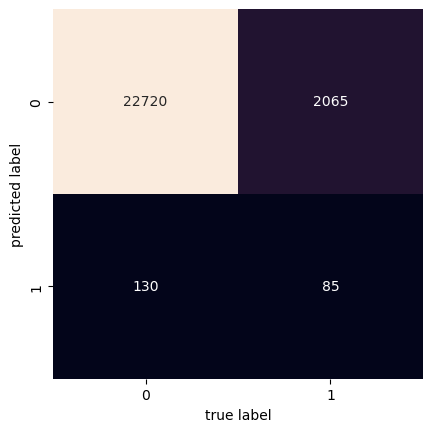

In [28]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [29]:
np.unique(y_pred, return_counts=True)

(array([0, 1], dtype=int64), array([24785,   215], dtype=int64))

In [30]:
pd.DataFrame(np.unique(y_pred, return_counts=True))

,0,1
0,0,1
1,24785,215


In [31]:
pd.DataFrame(np.unique(y_test, return_counts=True))

,0,1
0,0,1
1,22850,2150


# Random Forest Model

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
ypred = rf_model.predict(X_test)

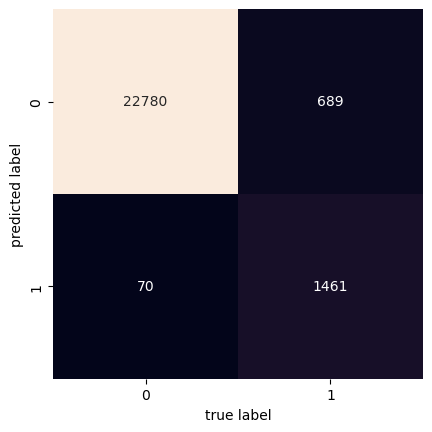

In [33]:
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [34]:
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     23469
           1       0.68      0.95      0.79      1531

    accuracy                           0.97     25000
   macro avg       0.84      0.96      0.89     25000
weighted avg       0.98      0.97      0.97     25000



In [35]:
print("Accuracy of model: ", accuracy_score(y_test, ypred))

Accuracy of model:  0.96964


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                             ('model', RandomForestClassifier(n_estimators=5,
                                                            random_state=0))])

In [37]:
from sklearn.model_selection import cross_val_score
scores = -1 * cross_val_score(my_pipeline, features, response,
                             cv =5, scoring='neg_mean_absolute_error')
print("MAE scores:\n", scores)
print("Average MAE score: \n", scores.mean())

MAE scores:
 [0.0339  0.03275 0.03495 0.03235 0.03395]
Average MAE score: 
 0.03358


# XGBoost

In [38]:
from xgboost import XGBClassifier
from sklearn.metrics import mean_absolute_error

In [39]:
xbg_model = XGBClassifier(n_estimators=1000, learning_rate=0.05,n_jobs=4,
                          early_stopping_rounds=5)
xbg_model.fit(X_train, y_train, eval_set=[(X_test, y_test)],verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=4, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [40]:
predictions = xbg_model.predict(X_test)
print("Mean Absolute Error: " + 
     str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.02816


In [41]:
accuracy_score(predictions, y_test)

0.97184

In [42]:
print(metrics.classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     23530
           1       0.68      0.99      0.81      1470

    accuracy                           0.97     25000
   macro avg       0.84      0.98      0.90     25000
weighted avg       0.98      0.97      0.97     25000



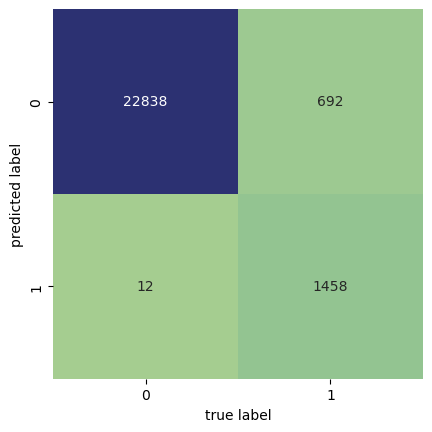

In [43]:
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, cmap="crest",fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

# Revision

In [67]:
diab_data['gender_num'] = pd.Categorical(diab_data['gender']).codes
diab_data['smoking_history_num'] = pd.Categorical(diab_data['smoking_history']).codes

In [68]:
neg_diab = diab_data[diab_data['diabetes']== 0]
neg_diab = neg_diab.sample(8500)

In [69]:
pos_diab = diab_data[diab_data['diabetes']== 1]

balanced_dataset = pd.concat([neg_diab, pos_diab],axis=0)
balanced_dataset

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_num,smoking_history_num
68265,Male,26.0,0,0,not current,27.32,4.0,160,0,1,5
91523,Female,25.0,0,0,never,48.35,6.5,145,0,0,4
935,Female,63.0,0,0,never,27.32,3.5,160,0,0,4
59095,Male,27.0,0,0,current,28.64,5.7,160,0,1,1
75055,Male,38.0,0,0,No Info,27.32,4.8,145,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
99935,Female,65.0,1,1,never,33.55,8.2,140,1,0,4
99938,Male,55.0,0,1,former,30.42,6.2,300,1,1,3
99957,Female,61.0,0,0,No Info,34.45,6.5,280,1,0,0
99962,Female,58.0,1,0,never,38.31,7.0,200,1,0,4


In [70]:
column_index = np.array([1,2,3,5,6,7,9,10])
features = balanced_dataset.iloc[:,column_index]
response = balanced_dataset['diabetes']
features

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender_num,smoking_history_num
68265,26.0,0,0,27.32,4.0,160,1,5
91523,25.0,0,0,48.35,6.5,145,0,4
935,63.0,0,0,27.32,3.5,160,0,4
59095,27.0,0,0,28.64,5.7,160,1,1
75055,38.0,0,0,27.32,4.8,145,1,0
...,...,...,...,...,...,...,...,...
99935,65.0,1,1,33.55,8.2,140,0,4
99938,55.0,0,1,30.42,6.2,300,1,3
99957,61.0,0,0,34.45,6.5,280,0,0
99962,58.0,1,0,38.31,7.0,200,0,4


In [71]:
X_train, X_test, y_train, y_test = train_test_split(features, response, random_state=42)

## Naive-Bayes

In [72]:
# Naive-Bayes model
from sklearn.naive_bayes import BernoulliNB
bern_model = BernoulliNB()
bern_model.fit(X_train, y_train)
y_pred = bern_model.predict(X_test)
print("Accuracy of model: ", accuracy_score(y_test, y_pred))

Accuracy of model:  0.6463529411764706


In [73]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.71      0.63      0.67      2396
           1       0.58      0.66      0.62      1854

    accuracy                           0.65      4250
   macro avg       0.65      0.65      0.64      4250
weighted avg       0.65      0.65      0.65      4250



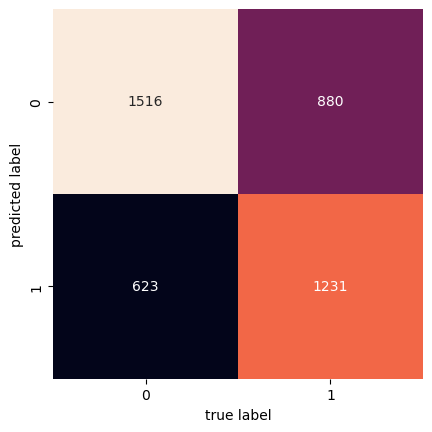

In [74]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## Random Forest

In [75]:
# Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
ypred = rf_model.predict(X_test)

In [76]:
print("Accuracy of model: ", accuracy_score(y_test, ypred))

Accuracy of model:  0.9035294117647059


In [77]:
print(metrics.classification_report(ypred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2105
           1       0.91      0.90      0.90      2145

    accuracy                           0.90      4250
   macro avg       0.90      0.90      0.90      4250
weighted avg       0.90      0.90      0.90      4250



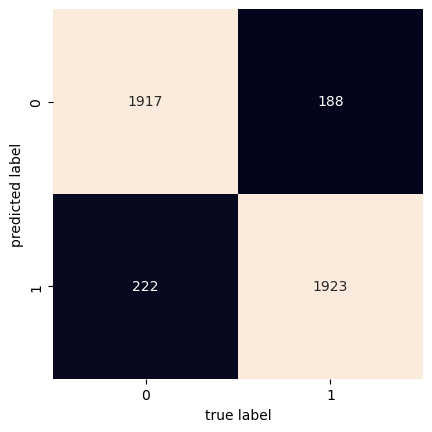

In [78]:
mat = confusion_matrix(y_test, ypred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

## XGBoost

In [79]:
xbg_model = XGBClassifier(n_estimators=1000, learning_rate=0.05,n_jobs=4,
                          early_stopping_rounds=5)
xbg_model.fit(X_train, y_train, eval_set=[(X_test, y_test)],verbose=False)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=5,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=4, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [80]:
predictions = xbg_model.predict(X_test)
print("Mean Absolute Error: " + 
     str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error: 0.0908235294117647


In [81]:
accuracy_score(predictions, y_test)

0.9091764705882353

In [82]:
print(metrics.classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2091
           1       0.92      0.90      0.91      2159

    accuracy                           0.91      4250
   macro avg       0.91      0.91      0.91      4250
weighted avg       0.91      0.91      0.91      4250



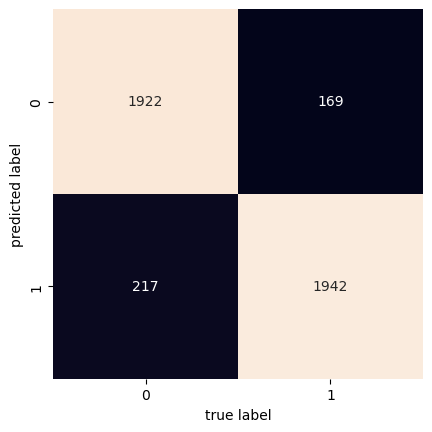

In [83]:
mat = confusion_matrix(y_test, predictions)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');